In [51]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
from scipy.optimize import minimize


In [2]:
df = pd.read_csv('AirPassenger.csv')
df.head()

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


# Holt Method - Double Exponential Smoothing

In [ ]:
y=df.Pax.values

def holt_method_old(y,alpha,beta):
    y_pred = []

    u.append(y[0])
    v.append(0)
    n=len(y)
    y_pred.append(0)

    for i in range(2,n):
        ui=alpha*y[i]+(1-alpha)*(u[i-1]+v[i-1])
        vi=beta*(ui-u[i-1])+(1-beta)*v[i-1]
        y_pred_i = ui+vi
        u.append(ui)
        v.append(vi)
        y_pred.append(y_pred_i)
    return(y_pred)

In [72]:
y=df.Pax.values

def holt_method(y,alpha,beta):
    y_pred = []

    u = y[0]
    v = y[1]-y[0]
    n=len(y)
    y_pred.append(y[0])
    y_pred.append(y[1])

    for i in range(2,n):
        old_u, u = u,alpha*y[i]+(1-alpha)*(u+v)
        v = beta*(u-old_u)+(1-beta)*v
        y_pred_i = u+v
        y_pred.append(y_pred_i)
    return(y_pred)

In [73]:
def get_mape_holt(intial_val):
    ypred = holt_method(y,alpha= intial_val[0],beta=intial_val[1])
    res = np.mean((y-ypred)**2)
    return(res)

Optimization terminated successfully.
         Current function value: 12.961596
         Iterations: 80
         Function evaluations: 154
Solution: [0.98608126 0.03389909]


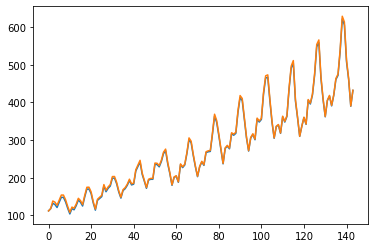

In [74]:
x0 = np.array([.2,.5])
res = minimize(get_mape, x0, method='nelder-mead',bounds=((0.0001,1),(0.00001,1)),
               options={'xatol': 1e-8, 'disp': True})
solution = res.get('x')
solution[solution<0] = 0
print('Solution:',solution)
y_pred = holt_method(y,alpha=solution[0],beta=solution[1])
plt.plot(y)
plt.plot(y_pred)
plt.show()

# Simple Exponential Smoothing - Single Exponential Smoothing

In [49]:
def simple_exp_smothing(y,alpha):
    y_pred = []

    u =y[0]
    y_pred.append(y[0])

    for i in range(1,n):
        y_pred_i_1 = alpha(y_pred[i-1])+(1-alpha)*(y[i]-y_pred[i-1])
        y_pred.append(y_pred_i_1)
    return(y_pred)

In [58]:
def get_mape_ses(intial_val):
    ypred = simple_exp_smothing(y,alpha= intial_val[0])
    res = np.mean((y-ypred)**2)
    return(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 64
Solution: [1.]


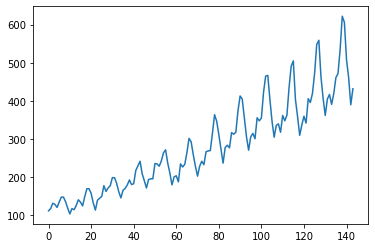

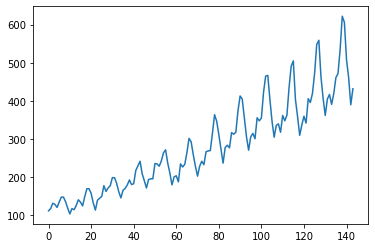

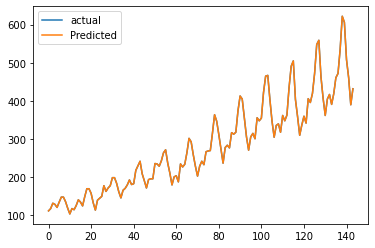

In [62]:
x0 = np.array([.2])
res = minimize(get_mape_ses, x0, method='nelder-mead',bounds=((0.0001,1)),
               options={'xatol': 1e-8, 'disp': True})
solution = res.get('x')
solution[solution<0] = 0
print('Solution:',solution)
y_pred = simple_exp_smothing(y,alpha=solution)
plt.plot(y)
plt.show()
plt.plot(y_pred)
plt.show()

plt.plot(y,label='actual')
plt.plot(y_pred,label='Predicted')
plt.legend()
plt.show()

# Wintor Holt Method - Triple Exponential Smoothing

In [67]:
y=df.Pax.values

def wintor_holt_method(y,alpha,beta,gama):
    L=[]
    T=[]
    S = []
    y_pred = []

    L.append(y[0])
    T.append(0)
    S.append(0)
    n=len(y)
    y_pred.append(0)

    for i in range(1,n):
        Li=alpha*(y[i]-S[i-1])+(1-alpha)*(L[i-1]+T[i-1])
        Ti=beta*(Li-L[i-1])+(1-beta)*T[i-1]
        Si=gama*(y[i]-L[i-1]-T[i-1])+(1-gama)*S[i-1]
        y_pred_i = Li+Ti+Si
        u.append(Li)
        v.append(Ti)
        y_pred.append(y_pred_i)
    return(y_pred)

def get_mape_winter_holt(intial_val):
    ypred = wintor_holt_method(y,alpha= intial_val[0],beta=intial_val[1],gama=intial_val[2])
    res = np.mean((y-ypred)**2)
    return(res)

In [68]:
x0 = np.array([.2,.5,.1])
res = minimize(get_mape_winter_holt, x0, method='nelder-mead',bounds=((0.0001,1),(0.00001,1),(0.00001,1)),
               options={'xatol': 1e-8, 'disp': True})
solution = res.get('x')
solution[solution<0] = 0
print('Solution:',solution)
y_pred = wintor_holt_method(y,alpha=solution[0],beta=solution[1],gama=solution[2])
plt.plot(y)
plt.plot(y_pred)
plt.show()

IndexError: list index out of range